In [1]:
import os
import cv2
import numpy as np
from glob import glob
import pprint
from pathlib import Path
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import random
from BEV.bev_transform import BEV
from src.cap_aug import generate_objects_random, generate_objects_bev_random, generate_objects_bev_coord
from src.utils import show_image, draw_bboxes

# Data generation

In [2]:
HUMAN_DATASET_ROOT = Path('data/human_dataset_filtered/')
# RZD_DATASET_ROOT = Path('/home/rauf/datasets/rostov/')
RZD_DATASET_ROOT = Path('/home/rauf/datasets/rzd/supervisely_mcc_500top/500top__4/img/')

In [3]:
# dest_image_name = 'Mon_Nov_16_163751_2020/camera1/img_174124862194.png'
# dest_image_name = 'Sun_Nov__8_141316_2020/camera1/img_900983.png'

# dest_image_name = 'LLZcmCameraBaslerJpegFrame2030000000.png'
dest_image_name = 'SLZcmCameraBaslerJpegFrame1592054000000000.png'
SOURCE_IMAGES = sorted(list(HUMAN_DATASET_ROOT.glob('*image.png')))
SOURCE_MASKS = sorted(list(HUMAN_DATASET_ROOT.glob('*mask.png')))

dest_image_name = RZD_DATASET_ROOT / dest_image_name
image = cv2.imread(str(dest_image_name))

generate 2 persons


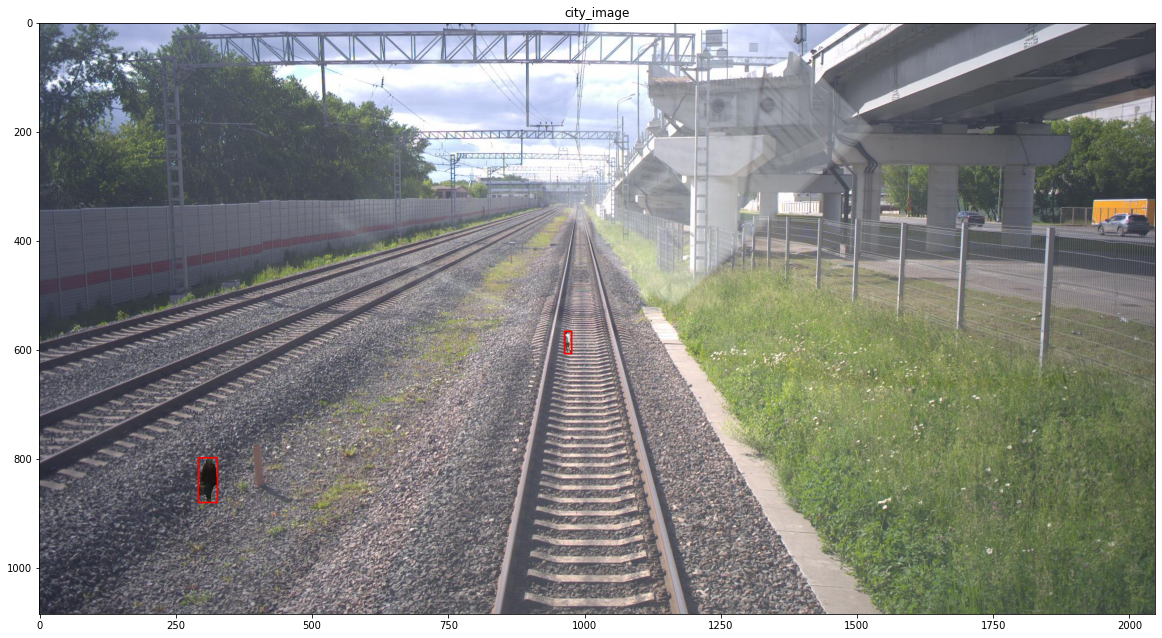

In [4]:
result_image, result_coords = generate_objects_random(image, SOURCE_IMAGES, SOURCE_MASKS)
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
draw_bboxes(result_image, result_coords)
show_image(result_image)

# BEV

In [5]:
camera_info = {'pitch' : -11 ,
               'yaw' : 0 ,
               'roll' : 0 ,
               'tx' : 0,
               'ty' : 5,
               'tz' : 0,
               'output_w': 1000,
               'output_h': 1000}
bev_transform = BEV(camera_info=camera_info)

In [6]:
dest_image_name = RZD_DATASET_ROOT / dest_image_name
img = cv2.imread(str(dest_image_name))

img_bev = bev_transform(img)

In [7]:
points = np.array([[0,10],[5,10], [-35.3,10], [0,50]])
heights = np.array([2.5, 2.3, 2.1,2.1])

generate 4 persons


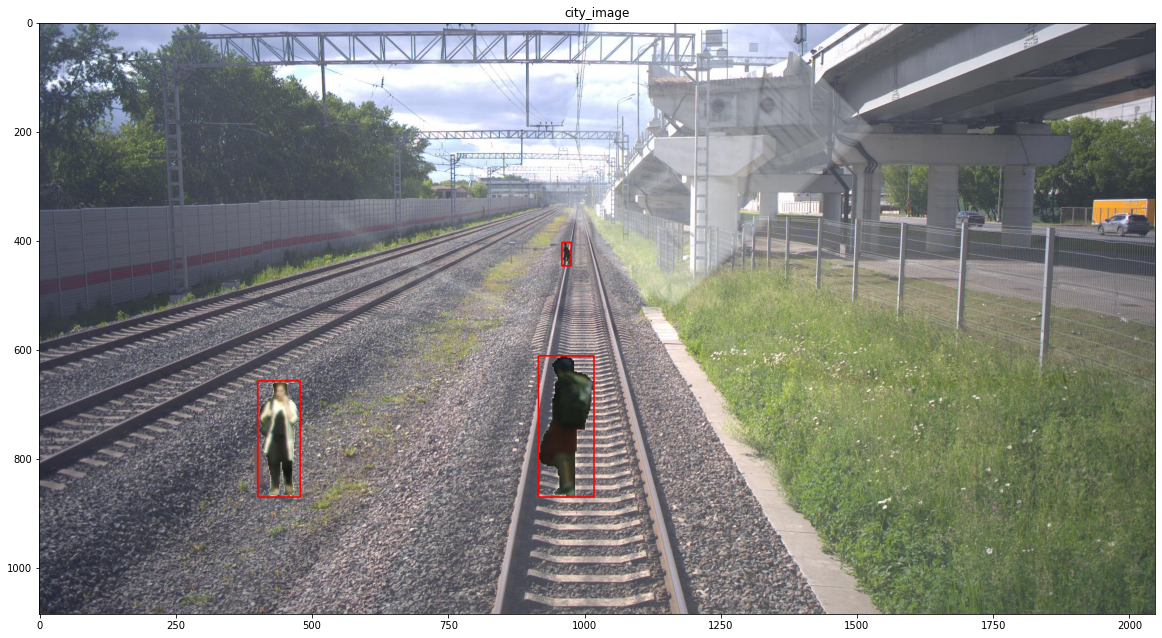

In [8]:
result_image, result_coords = generate_objects_bev_coord(image, bev_transform, SOURCE_IMAGES, SOURCE_MASKS, points, heights)
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
draw_bboxes(result_image, result_coords)
show_image(result_image)

generate 18 persons


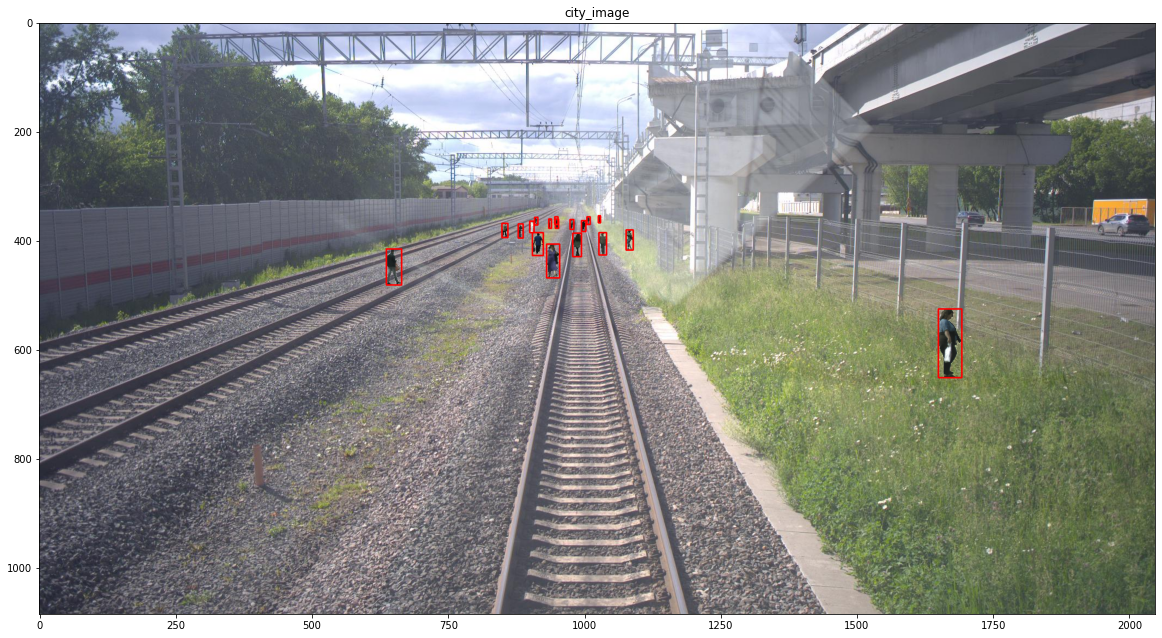

In [9]:
result_image, result_coords = generate_objects_bev_random(image, bev_transform, SOURCE_IMAGES, SOURCE_MASKS, min_n_objects=10, 
                                                                                              max_n_objects=20,
                                                                                              h_range=[2.5, 2.5],
                                                                                              x_range=[-12, 12],
                                                                                              y_range=[0 ,200])
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
draw_bboxes(result_image, result_coords)
show_image(result_image)